<a href="https://colab.research.google.com/github/RayKwon2040/house-price-prediction/blob/main/Prediction_of_house_prices_in_King_County.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICTION OF HOUSE PRICES IN KING COUNTY**

## **Introduction**

It is a dataset house sold between May 2014 to May 2015 in King County an area. The dataset consisted of 21 variables and 21,613 observations.

*Key features*

*   Description of houses
*   Location
*   Date of selling
*   **Price**



The primary objective of this project is to develop an accurate predictive model that estimates house prices based on location and type of house for real estate development projects in King county. This predictive model forecast the ideal selling price based on the property features, locatinon, allowing for more competitive pricing and faster sales.


## **Table of Contents**


1.   EDA
2.   Feature Engineering
3.   Model Development
  *     Linear Regression
  *     Random Forest
  *     Gradient Boosting
  *     XGBoost
4. Conclusion










## **EDA (Exploratory Data Analysis)**

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Data Import


df = pd.read_csv('/content/drive/MyDrive/data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#Data Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
# Data Description

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
# Check Null

df.isna().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [7]:
#Remove Null

df.dropna(inplace=True)

In [8]:
# Check duplication of data

sum(df.duplicated())

0

In [9]:
df.nunique()

,0
id,21434
date,372
price,4028
bedrooms,13
bathrooms,30
sqft_living,1038
sqft_lot,9782
floors,6
waterfront,2
view,5


In [10]:
#Check outliers

outliers_check = ['sqft_living15', 'sqft_lot15', 'sqft_living', 'sqft_above', 'sqft_lot']

for col in df[outliers_check]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

sqft_living15: 544 outliers
sqft_lot15: 2194 outliers
sqft_living: 572 outliers
sqft_above: 611 outliers
sqft_lot: 2425 outliers


In [11]:
# Convert Date into Datetime and extract year and month
df['date'] = pd.to_datetime(df['date'])

In [12]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [13]:
# Columns to be dropped
dropped_columns = ['id', 'date', 'lat', 'long']

**Redundant Column**
- ID: reference number is redundant
- Date: Column of date is obeject. Year and month must be extracted
- Lat & Long: Zip code is used for location

In [14]:
df = df.drop(dropped_columns, axis=1)

In [15]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'year', 'month'],
      dtype='object')

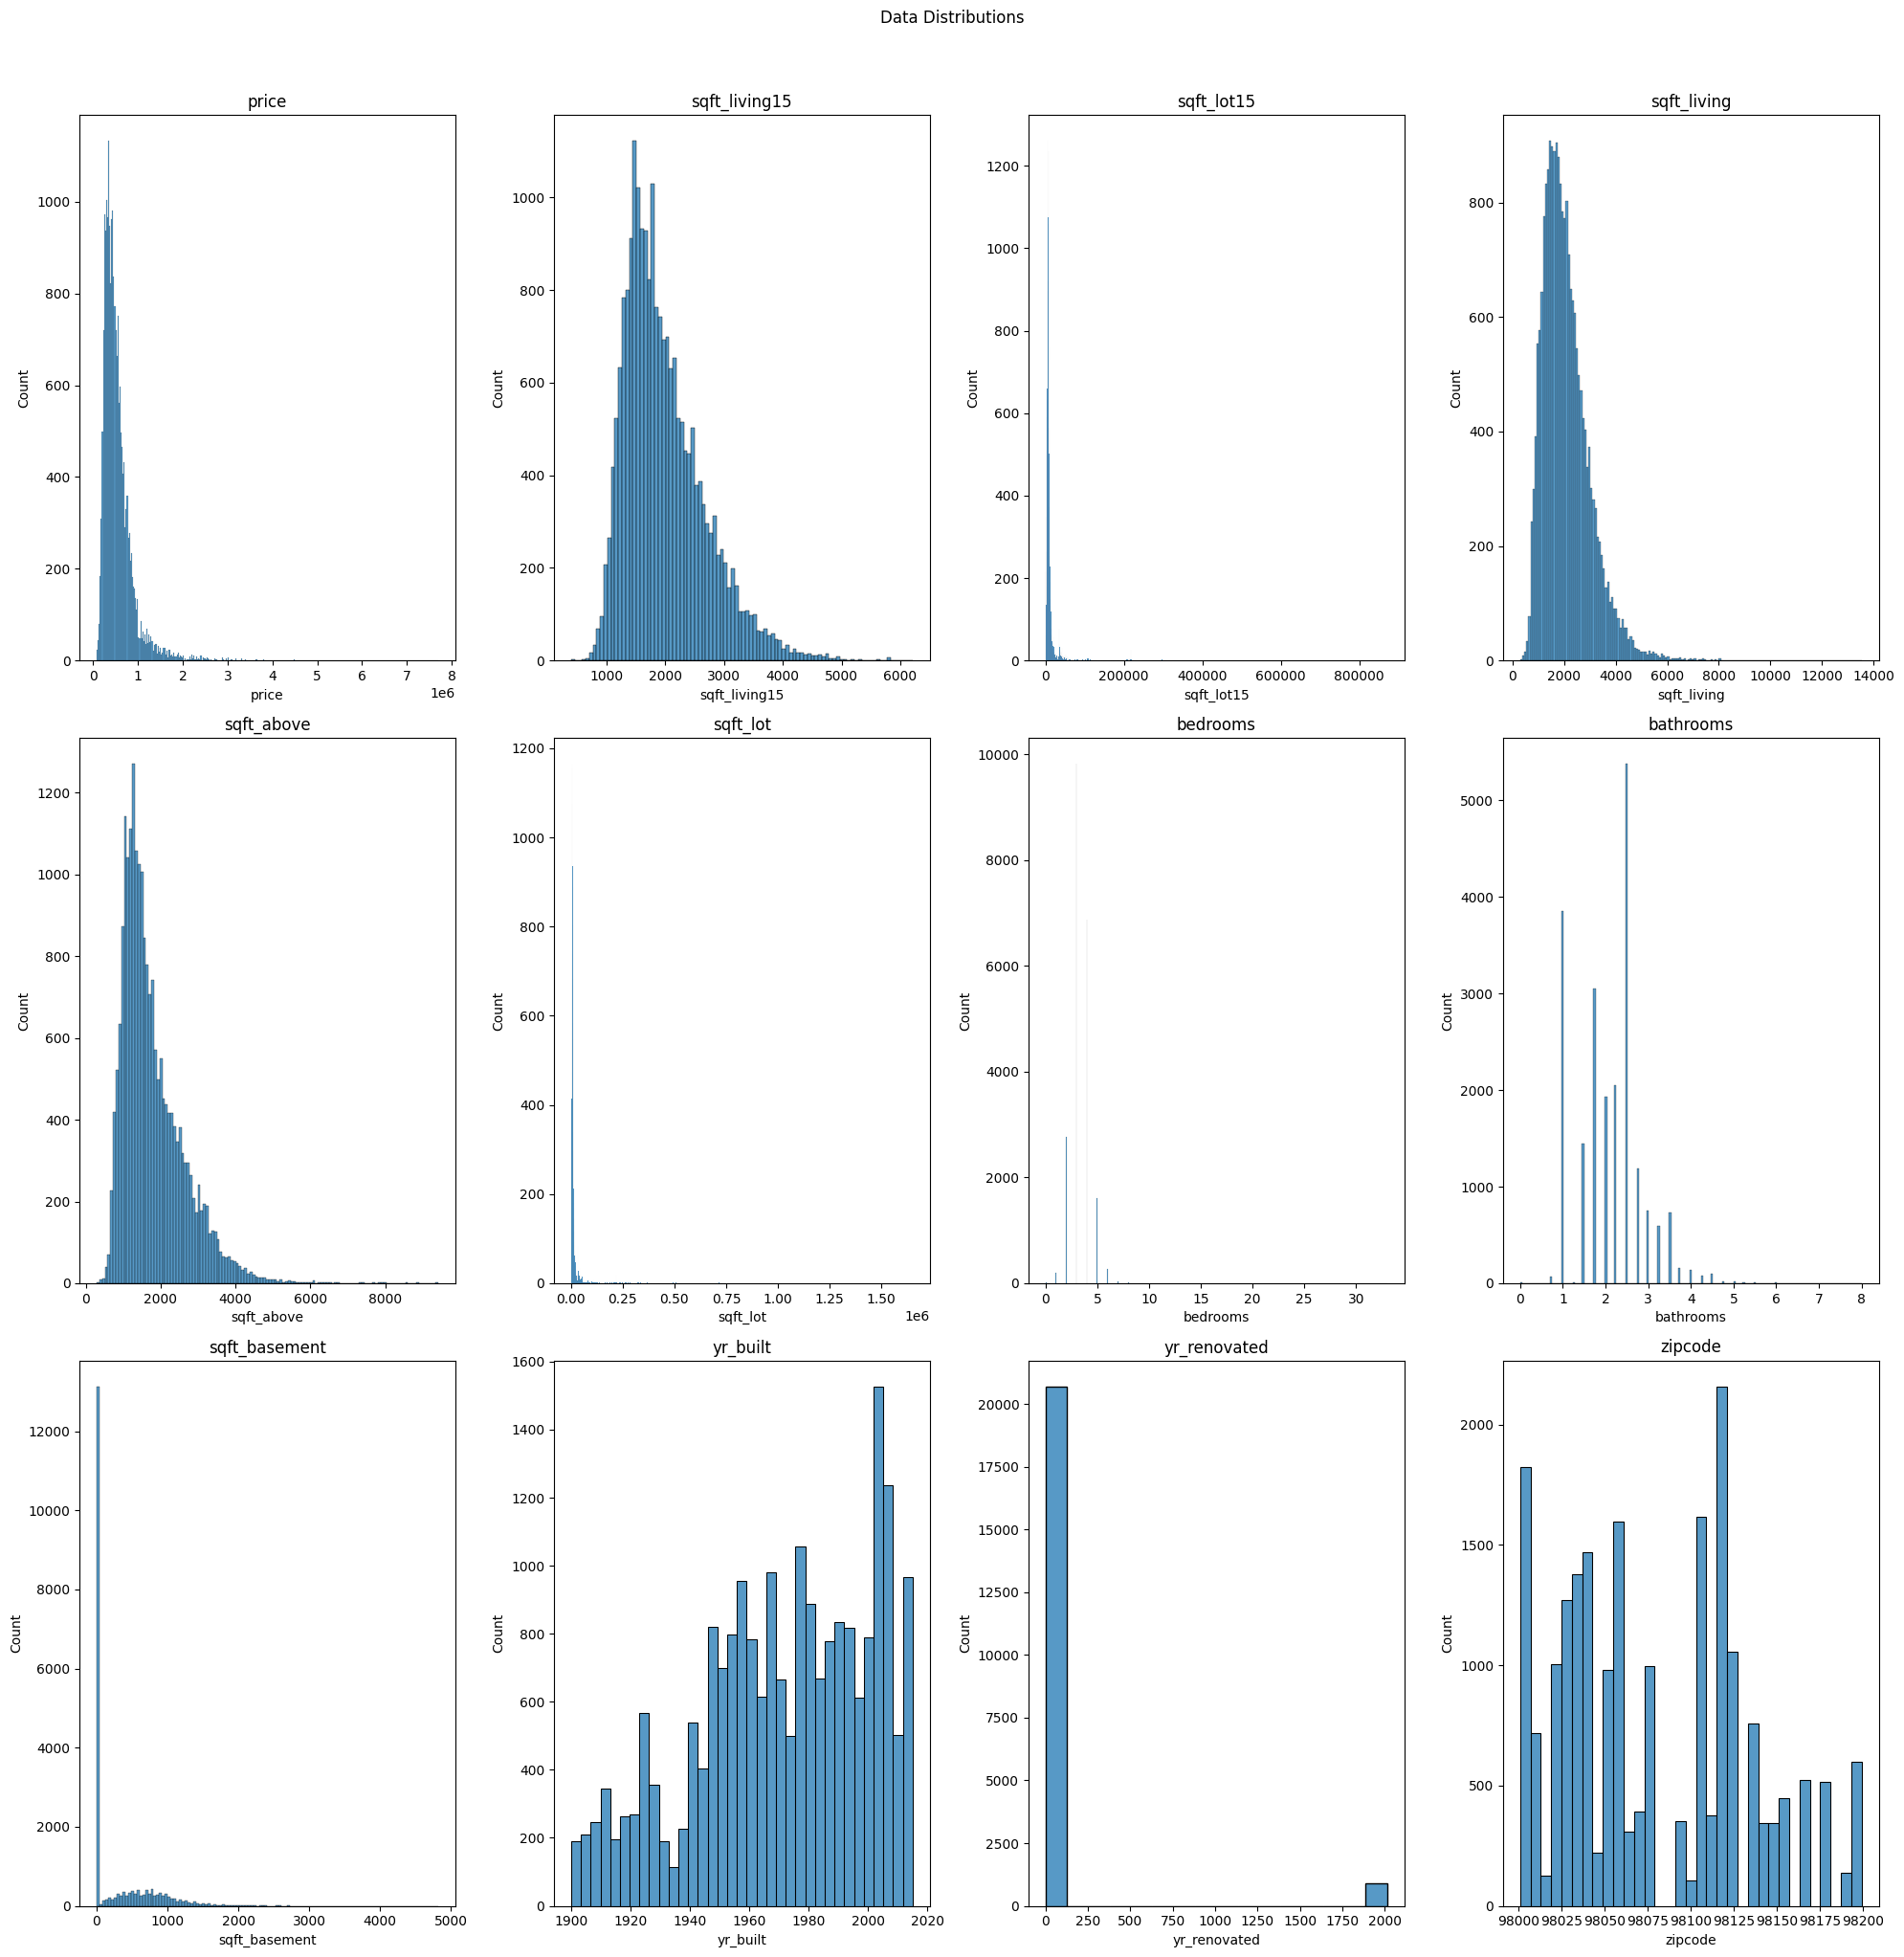

In [16]:
# Distributions of each feature
fig, axes = plt.subplots(figsize=(20,20),ncols=4,nrows=3)
hist_columns = ['price','sqft_living15','sqft_lot15', 'sqft_living', 'sqft_above', 'sqft_lot','bedrooms', 'bathrooms', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode']
for i in range(len(hist_columns)):
    col = hist_columns[i]
    x = i // 4
    y = i % 4
    ax = axes[x,y]

    sns.histplot(df[col],ax=ax, bins = 'auto')
    ax.set_title(col)
    fig.suptitle('Data Distributions', y=1.02)
    fig.tight_layout()



*   The size and the number of bathrooms and bedrooms are highly left-skewed because there are a few exceptionally large houses. Accordingly, the price is highly left-skewed.
*   Most houses in king county have been built since 1960, so it shows right skewed distribution.
*   Most houses in king county have not been renovated.


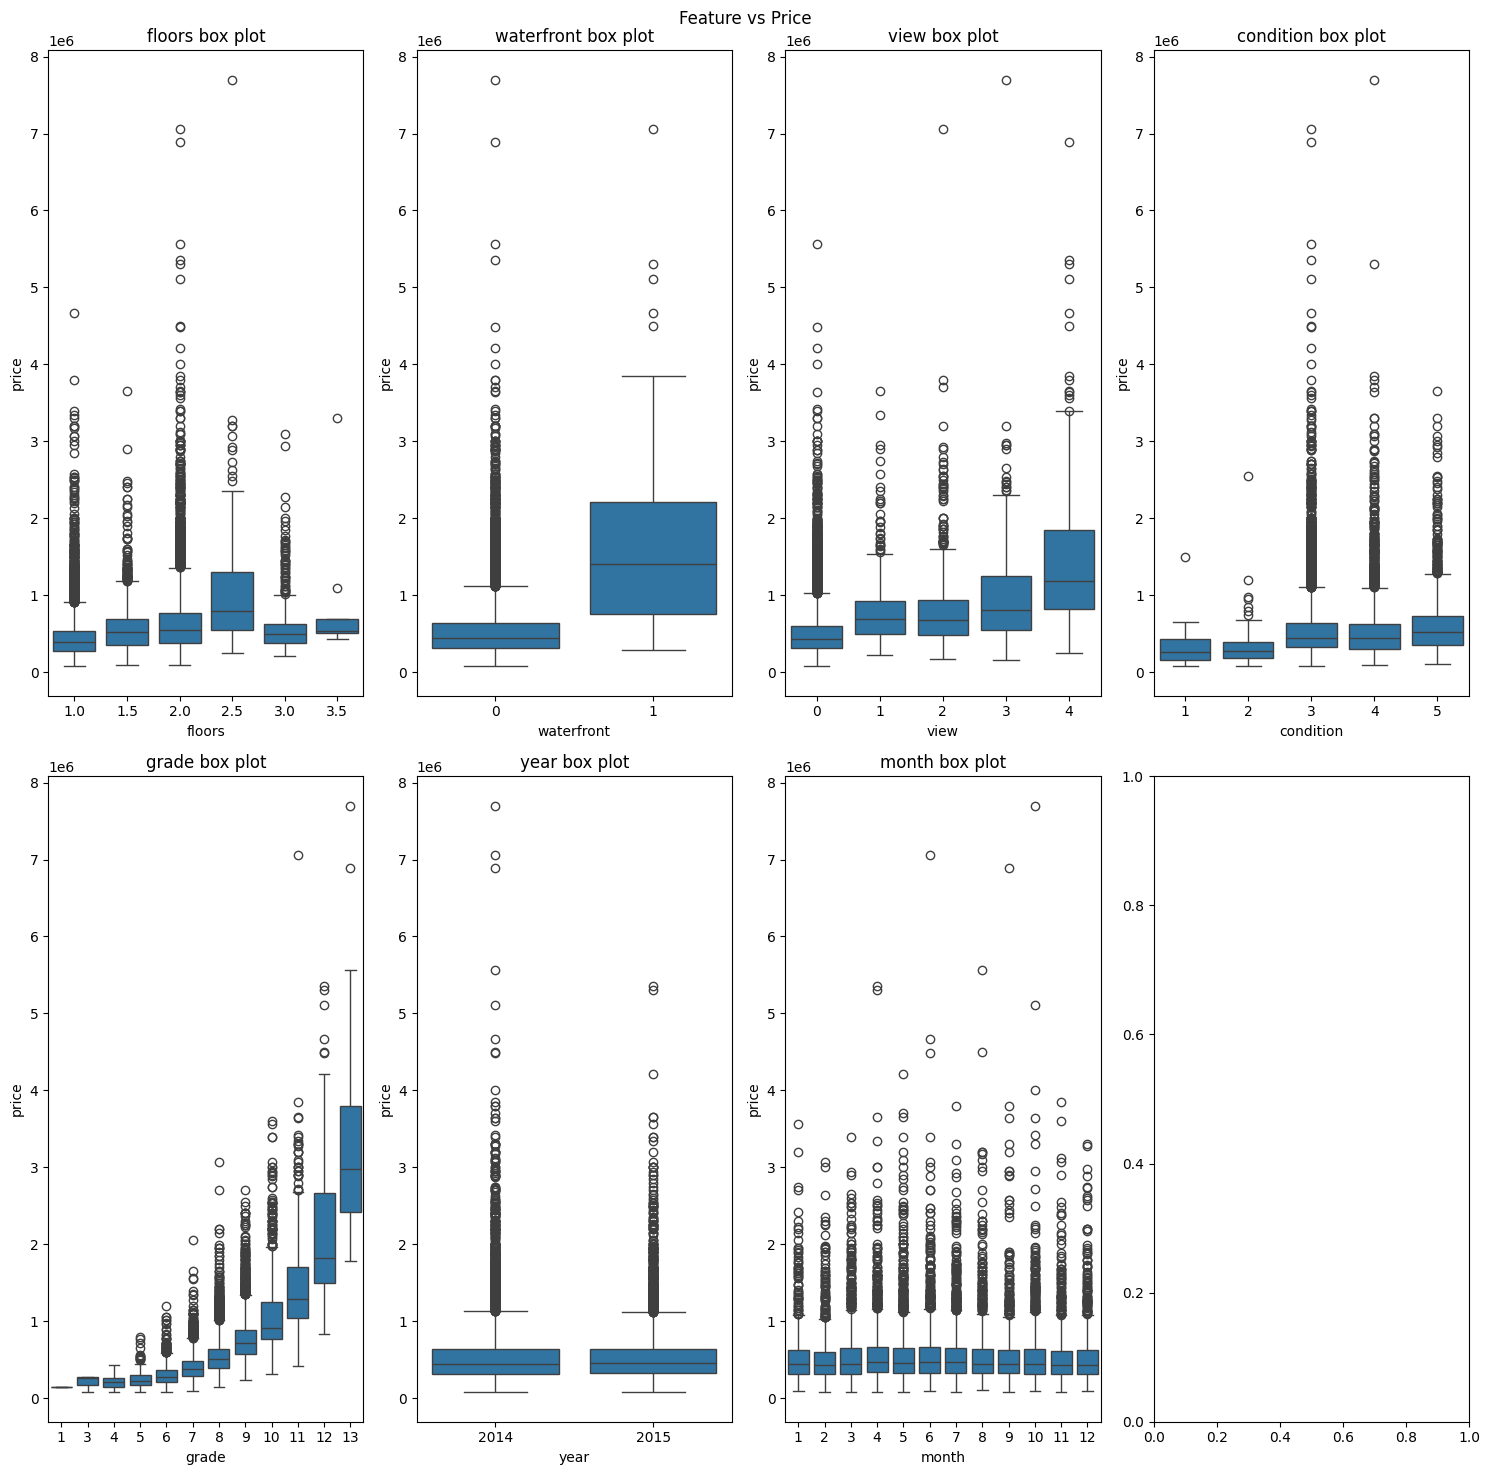

In [17]:
# Boxplots of categorical columns
cat_columns = [ 'floors','waterfront', 'view', 'condition', 'grade', 'year', 'month']
fig, axes = plt.subplots(figsize=(15,15),ncols=4,nrows=2)
for i in range(len(cat_columns)):
    col = cat_columns[i]
    y = i%4
    x = i//4
    ax = axes[x,y]

    # Check if the column exists in the DataFrame before plotting
    if col in cat_columns:
        sns.boxplot(x=col, y='price', data=df, ax=ax)
        ax.set_title(col + ' box plot')
    else:
        print(f"Column '{col}' not found in DataFrame. Skipping boxplot.")

fig.suptitle('Feature vs Price')
fig.tight_layout()



*   Higher-grade houses tend to have a wider range of prices. This means better houses are more negotiable
*   Houses without s view shows more outliers
*   it shows substantial outliers from condition3



Text(0.5, 1.0, 'Correlation of Continuous Features')

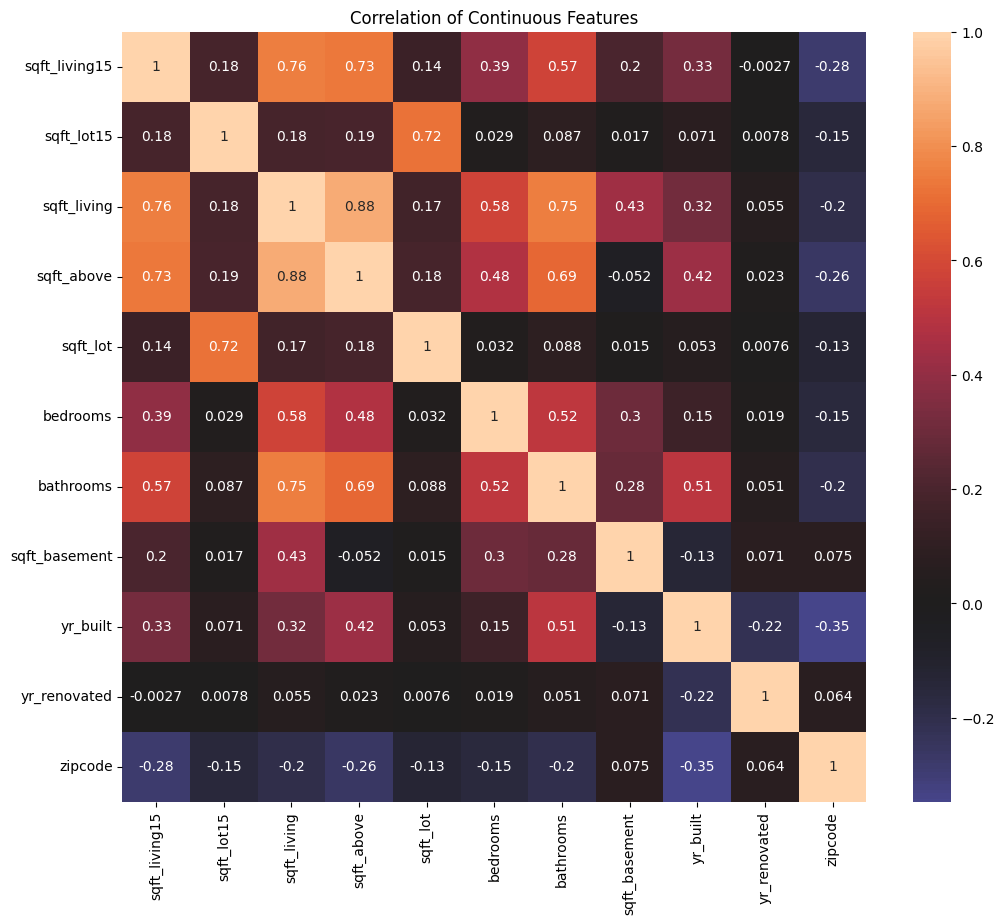

In [18]:
cor = ['sqft_living15','sqft_lot15', 'sqft_living', 'sqft_above', 'sqft_lot','bedrooms', 'bathrooms', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode']

corr = df[cor ].corr()
plt.figure(figsize=(12, 10)) # Increase the figure size
sns.heatmap(corr, center=0, annot=True).set_title('Correlation of Continuous Features')

Multicolinearity is present when we include 'sqft_living15','sqft_lot15', 'sqft_living', and 'sqft_above'. the coefficient is higher than 0.7. Therefore I will remove them to make reliable regression.

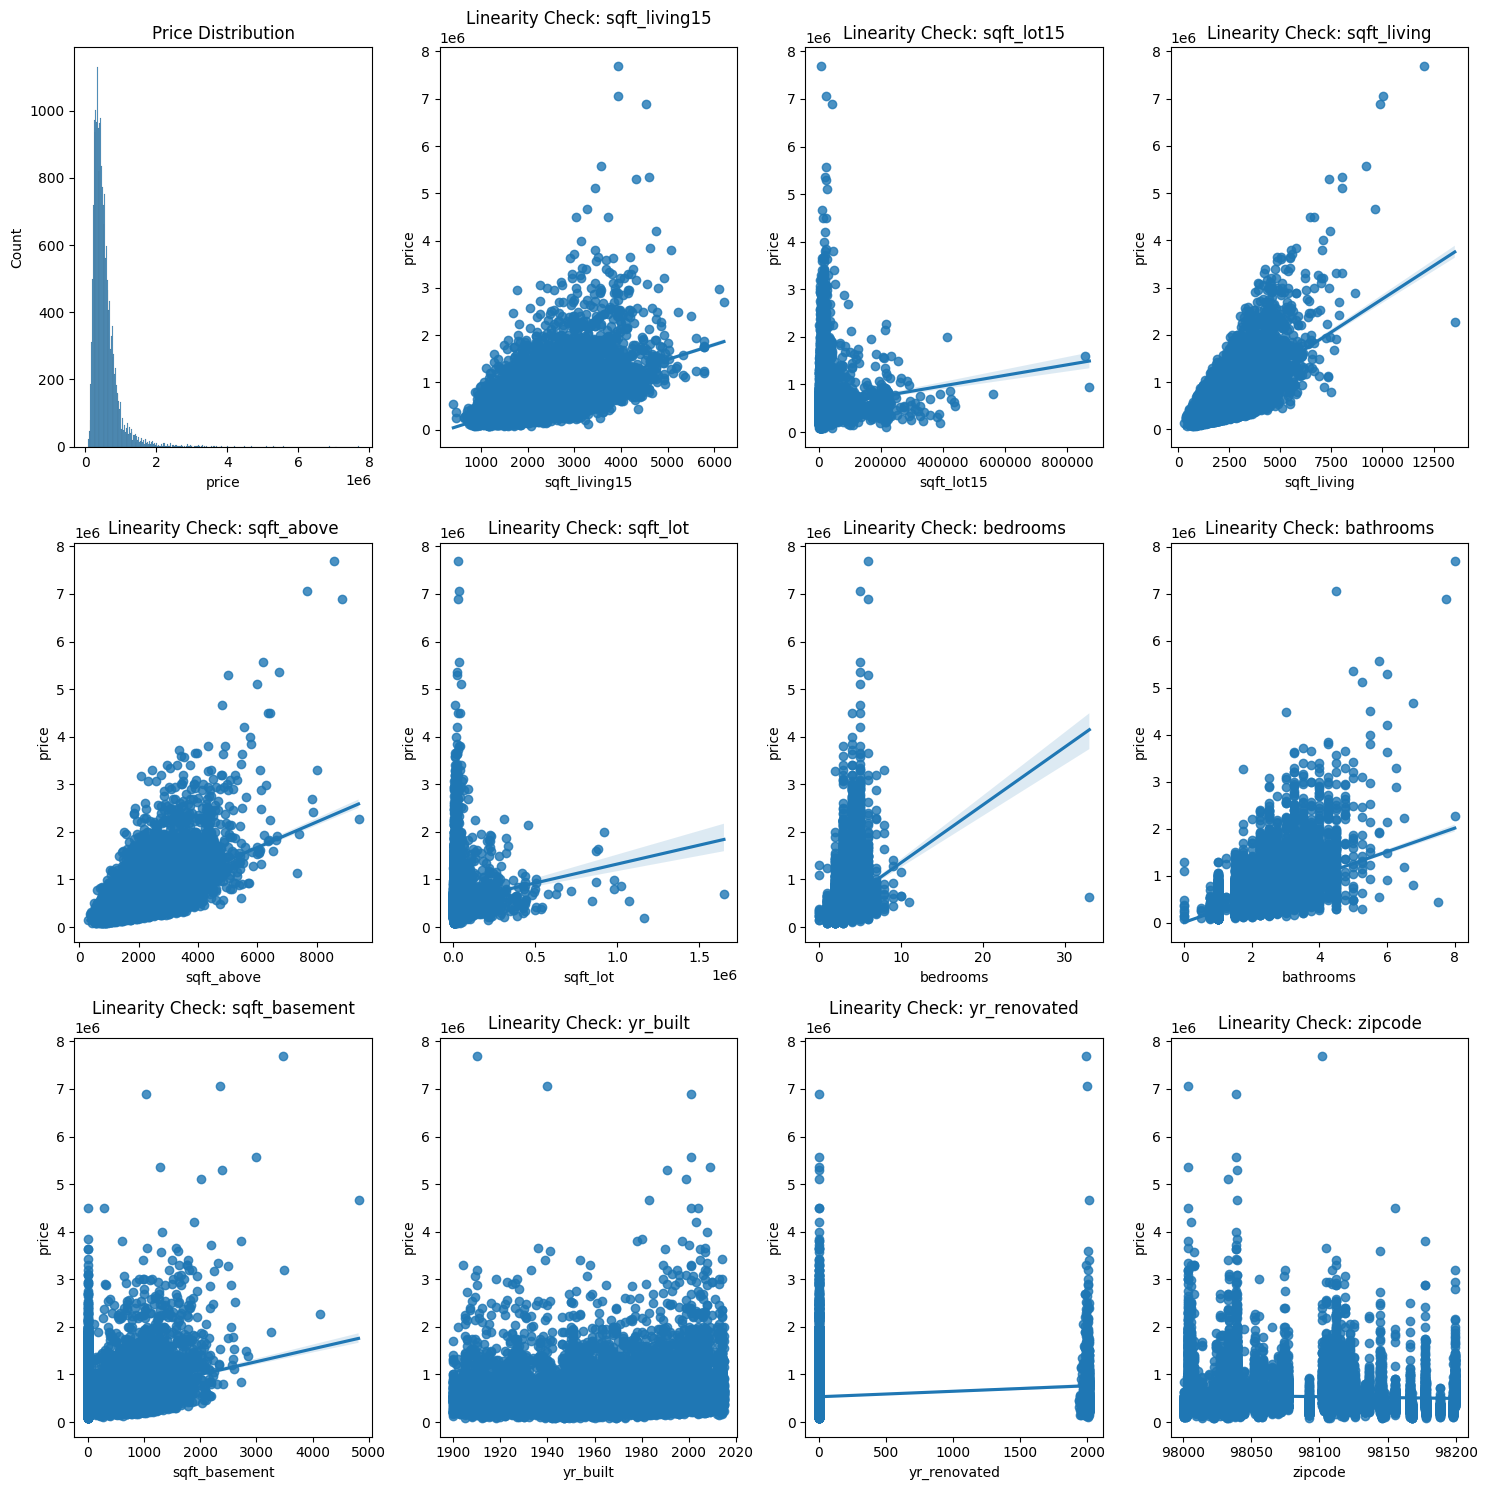

In [19]:
#Pre-Modeling Linearity Check

fig, axes = plt.subplots(3, 4, figsize=(15, 15))

sns.histplot(df['price'], ax=axes[0][0]).set_title('Price Distribution')

# Regplot
for feat, ax in zip(cor, axes.flatten()[1:]):
  sns.regplot(x=feat,y='price', data=df, ax=ax).set_title(f'Linearity Check: {feat}')


# Fix layout overlap
plt.tight_layout()
fig.show()



*   It shows linearity with price except the following features

1.   Year of bulit
2.   Year of renovation
3.   Zip code


## **Feature Engineering**

In [20]:
# One-Hot encoding for Zip Code

df = pd.get_dummies(df, columns=['zipcode'], drop_first=True)

In [21]:
# Create binary feature for year of renovation

df = df.assign(renovated=lambda x: x.yr_renovated.gt(0).astype(int))

In [22]:
df=df.drop('yr_renovated', axis=1)

In [23]:
#Log transformation for price

df['price']=np.log1p(df['price'])

**Transformation for linear Regression**

Linear regression is very sensitive to outliers and multicolinearity, so the dataset is need to be transformed for the model.

In [24]:
df_lr = df.copy()

In [25]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assume your feature matrix is X (without the target variable)
X = df_lr.drop('price', axis=1)

# Add constant for intercept
X_const = sm.add_constant(X)

X_const = X_const[['sqft_living15','sqft_lot15', 'sqft_living', 'sqft_above', 'sqft_lot','bedrooms', 'bathrooms', 'sqft_basement', 'yr_built']]

# Calculate VIF
vif = pd.DataFrame()
vif["Feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i)
              for i in range(X_const.shape[1])]

# Drop the constant row
vif = vif[vif["Feature"] != "const"]

print(vif)

         Feature        VIF
0  sqft_living15  23.381855
1     sqft_lot15   2.563667
2    sqft_living        inf
3     sqft_above        inf
4       sqft_lot   2.359293
5       bedrooms  21.906038
6      bathrooms  20.862287
7  sqft_basement        inf
8       yr_built  20.594010


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Remove the following feature becasue the VIF is higher than 15 (Serious Mulicolinearity)



*   sqft_living15
*   sqft_living
*   sqft_above
*   bedroms
*   bathrooms
*   sqft_basements
*   yr_bulit


In [26]:
#Remove Multicolinearity

df_lr = df_lr.drop(['sqft_living15','sqft_living', 'sqft_above', 'bedrooms', 'bathrooms', 'sqft_basement', 'yr_built'], axis=1)



In [27]:
# Log transformation (price)
df_lr = df_lr[df_lr['price'] < df_lr['price'].quantile(0.99)]



# Log transformation (sqft_lot15)
df_lr = df_lr[df_lr['sqft_lot15'] < df_lr['sqft_lot15'].quantile(0.99)]
df_lr['sqft_lot15']=np.log1p(df_lr['sqft_lot15'])


# Log transformation (sqft_lot)
df_lr = df_lr[df_lr['sqft_lot']< df_lr['sqft_lot'].quantile(0.99)]
df_lr['sqft_lot']=np.log1p(df_lr['sqft_lot'])





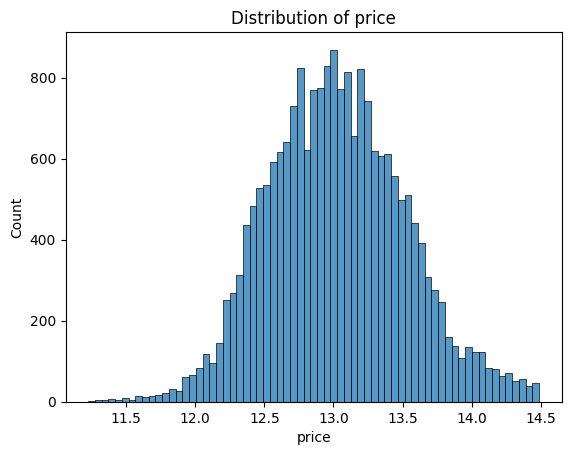

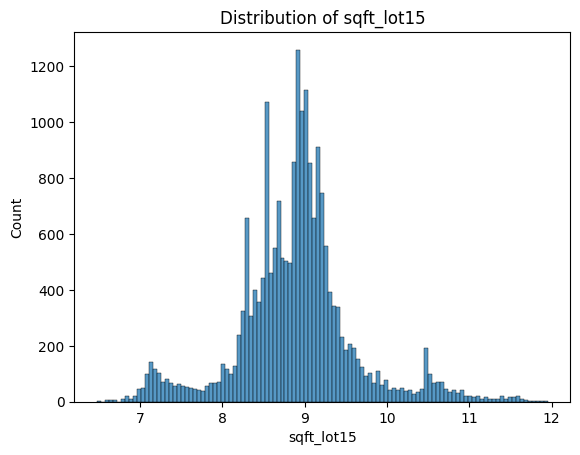

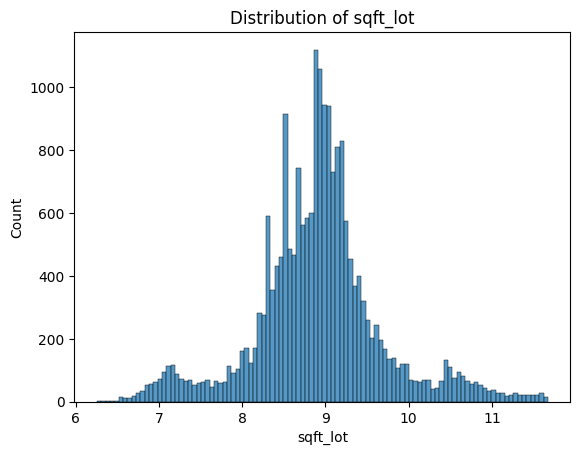

In [28]:
for col in ['price','sqft_lot15','sqft_lot']:
  sns.histplot(df_lr[col])
  plt.title(f'Distribution of {col}')
  plt.show()

## **Model Development**

### **Linear Regression**

In [29]:
X_lr = df_lr.drop('price', axis=1)
y_lr = df_lr['price']

In [30]:
# Test train split

from sklearn.model_selection import train_test_split
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=123)

In [31]:
#Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

model_lr = LinearRegression()
model_lr.fit(X_train_lr, y_train_lr)

# Calculate Mean Squared Error
y_train_pred_lr = model_lr.predict(X_train_lr)
lr_train_loss_ms = mean_squared_error(y_train_lr, y_train_pred_lr)

y_test_pred_lr = model_lr.predict(X_test_lr)
lr_test_loss_ms = mean_squared_error(y_test_lr, y_test_pred_lr)
lr_test_loss_mae = mean_absolute_error(y_test_lr, y_test_pred_lr)


# Calculate R2 score
y_train_pred_lr = model_lr.predict(X_train_lr)
lr_scores_r2 = r2_score(y_test_lr, y_test_pred_lr)

# Calculate cross-validation scores

lr_scores_mse = cross_val_score(model_lr, X_lr, y_lr, cv=5, scoring = 'neg_mean_squared_error')


print(f'LinearRegression R2: {lr_scores_r2}')
print(f'LinearRegression train MSE: {lr_train_loss_ms}')
print(f'LinearRegression test MSE: {lr_test_loss_ms}')
print(f'LinearRegression neg_mean_squared_error: {lr_scores_mse.mean()} +/- {lr_scores_mse.std()}')



LinearRegression R2: 0.8134071055420257
LinearRegression train MSE: 0.04455782661087034
LinearRegression test MSE: 0.04495885652117092
LinearRegression neg_mean_squared_error: -0.04553723262620003 +/- 0.002362199840854171


R2 indicate that the model explains 82.2% of the variance in the target. Also, train MSE and test MSE are very close, so there is no overfitting. As a result of cross validation, standard deviation is very low, so it shows consistent performance.  

## **Feature Importance (Linear Regression)**

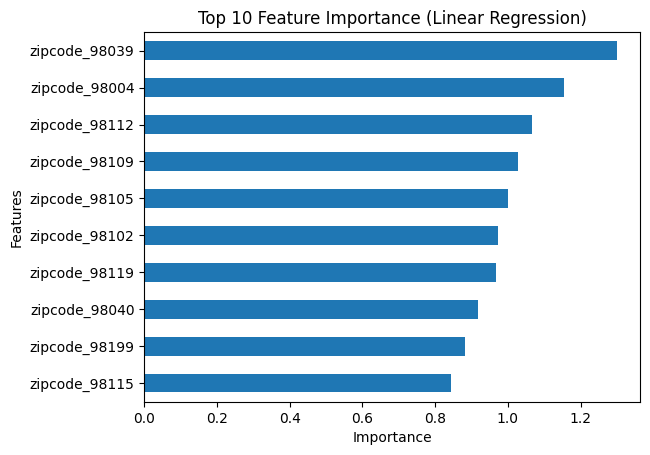

In [32]:
import numpy as np
import pandas as pd

importances_lr = np.abs(model_lr.coef_)

# Convert the NumPy array to a pandas Series for plotting
importances_lr = pd.Series(importances_lr, index=X_train_lr.columns)

# Select the top 10 features by importance
top_10_importances_lr = importances_lr.sort_values(ascending=False).head(10)

top_10_importances_lr.sort_values().plot(kind='barh')
plt.title("Top 10 Feature Importance (Linear Regression)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

### **Homoscedasticity and Normality**

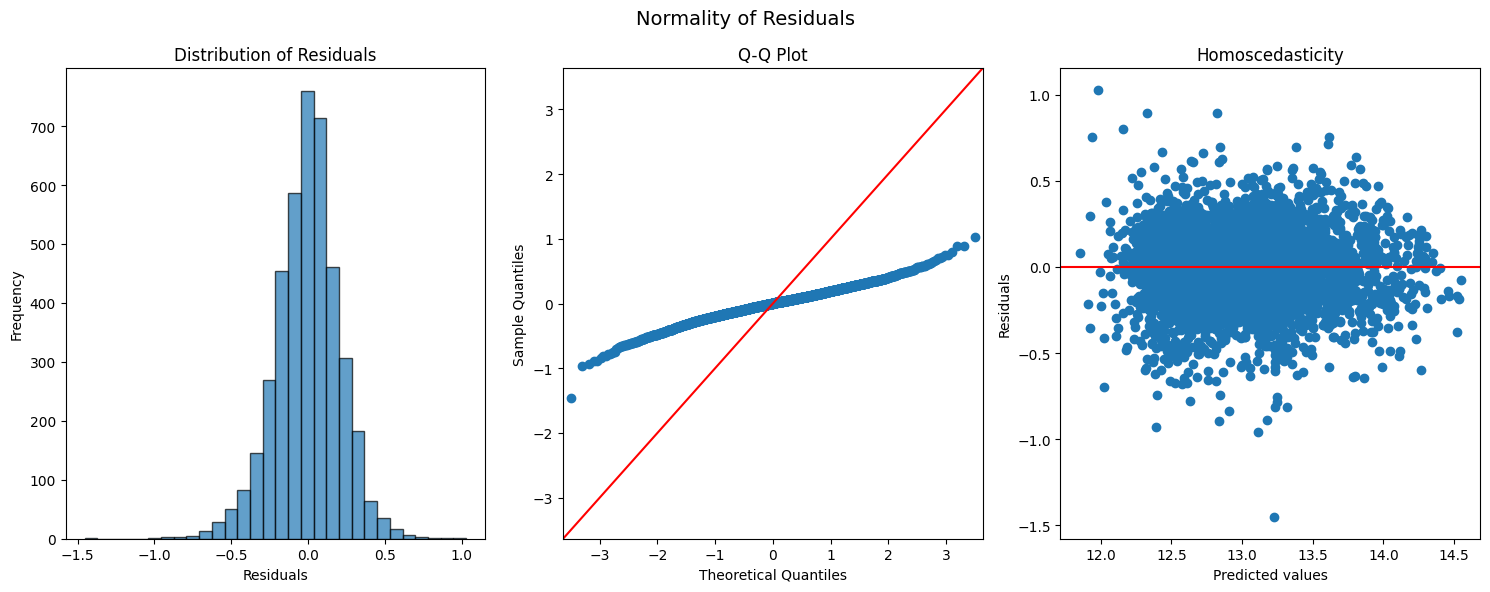

In [33]:
# Function for qq_plots
import scipy.stats as stats
import statsmodels.api as sm

# Create subplots
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 6))

# Extract residuals from model
residuals = y_test_lr - y_test_pred_lr

# Histogram of residuals
ax0.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
ax0.set_xlabel('Residuals')
ax0.set_ylabel('Frequency')
ax0.set_title('Distribution of Residuals')

# Q-Q plot
sm.qqplot(residuals, dist=stats.norm, line='45', ax=ax1)
ax1.set_title('Q-Q Plot')

# Heteroscedasticity
ax2.scatter(y_test_pred_lr, residuals)
ax2.axhline(0, color='red')
ax2.set_xlabel("Predicted values")
ax2.set_ylabel("Residuals")
ax2.set_title("Homoscedasticity")

# Overall title
fig.suptitle('Normality of Residuals', fontsize=14)

plt.tight_layout()
plt.show()

As a result of check for homoscedasticity and normality, Residuals are mostly normal but slightly light-tailed. The distribution is a bit flatter than normal on qq plot. The model doesn't show heteroscedasticity, which means variance looks stable because it is centered around 0 and no clear pattern. Therefore the model is acceptable for prediction

In [34]:
X = df.drop('price', axis=1)
y = df['price']

In [35]:
# Test train split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

### **Decision Tree**

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

model_dt = DecisionTreeRegressor() # Instantiate the DecisionTreeRegressor
model_dt.fit(X_train, y_train)

#Calculate Train loss
y_train_pred_dt = model_dt.predict(X_train)
y_test_pred_dt = model_dt.predict(X_test)
dt_train_loss_ms = mean_squared_error(y_train, y_train_pred_dt)
dt_test_loss_ms = mean_squared_error(y_test, y_test_pred_dt)

#Calculate Cross-Validation Scores

dt_scores_mse = cross_val_score(model_dt, X, y, cv=5, scoring='neg_mean_squared_error')

print(f'Decision Tree R2: {model_dt.score(X_test, y_test)}')
print(f'Decision Tree train MSE: {dt_train_loss_ms}')
print(f'Decision Tree test MSE: {dt_test_loss_ms}')
print(f'Decision Tree neg_mean_squared_error: {dt_scores_mse.mean()} +/- {dt_scores_mse.std()}')

Decision Tree R2: 0.6664392590825134
Decision Tree train MSE: 3.2272479300128414e-07
Decision Tree test MSE: 0.09218838926635906
Decision Tree neg_mean_squared_error: -0.09586926314226589 +/- 0.005257061453334198


R2 indicate that the model explains 66.8% of the variance in the target. However, there is a huge gap between train MSE and test MSE. It shows severe overfitting, so regulazation is required to prevent overfitting.



In [37]:
#GridSearchCV (Decision Tree)

from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

#Define parameter
param_grid = {
    'max_depth': [3, 5, 7, 9, 11, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

#Grid Search with 5-fold CV using neg_mean_squared_error
grid_search = GridSearchCV(
    estimator=model_dt,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=2
)

#Fit on training set
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validated MSE:", -grid_search.best_score_)


#Evaluate on test data
best_dt = grid_search.best_estimator_
y_pred_train_df = best_dt.predict(X_train)
train_mse_df = mean_squared_error(y_train, y_pred_train_df)



#Evaluate on test data
y_pred_test_df = best_dt.predict(X_test)
test_mse_df = mean_squared_error(y_test, y_pred_test_df)
test_mae_df = mean_absolute_error(y_test, y_pred_test_df)
dt_r2_score = r2_score(y_test, y_pred_test_df)
test_mae_df = mean_absolute_error(y_test, y_pred_test_df)

print("Train MSE:", train_mse_df)
print("Test MSE:", test_mse_df)
print(f"Decision Tree R2 Score: {dt_r2_score}")


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 20}
Best cross-validated MSE: 0.0784855110657397
Train MSE: 0.02090272565646815
Test MSE: 0.07439862256268909
Decision Tree R2 Score: 0.7308071020359296


## **Feature Importance (Decision Tree)**

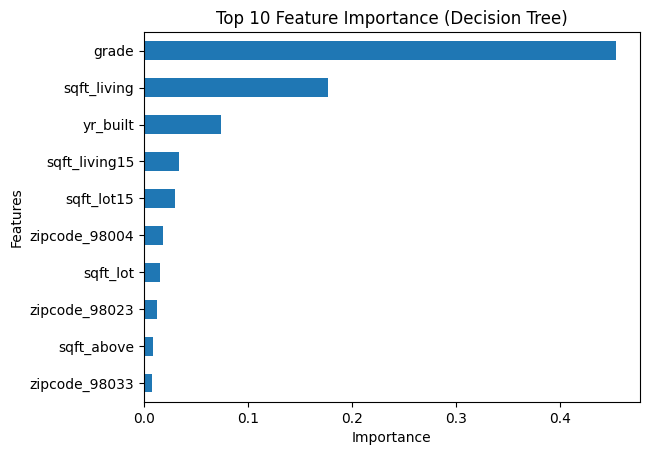

In [38]:


# Convert the NumPy array to a pandas Series for plotting
importances_dt = pd.Series(best_dt.feature_importances_, index=X_train.columns)

# Select the top 10 features by importance
top_10_importances_dt = importances_dt.sort_values(ascending=False).head(10)

top_10_importances_dt.sort_values().plot(kind='barh')
plt.title("Top 10 Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

After tuning the model (max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 20), it shows no more overfitting because cross-validated MSE is close to test MSE. it means cross-validation estimate accurately predicted test performance.

### **Random Forest**



In [39]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor() # Instantiate the DecisionTreeRegressor
model_rf.fit(X_train, y_train)

#Calculate loss
y_train_pred_rf = model_rf.predict(X_train)
y_test_pred_rf = model_rf.predict(X_test)
rf_train_loss_ms = mean_squared_error(y_train, y_train_pred_rf)
rf_test_loss_ms = mean_squared_error(y_test, y_test_pred_rf)

#Calculate Cross-Validation Scores

rf_scores_mse = cross_val_score(model_rf, X, y, cv=5, scoring='neg_mean_squared_error')

print(f'Random Forest R2: {model_rf.score(X_test, y_test)}')
print(f'Random Forest train MSE: {rf_train_loss_ms}')
print(f'Random Forest test MSE: {rf_test_loss_ms}')
print(f'Random Forest neg_mean_squared_error: {rf_scores_mse.mean()} +/- {rf_scores_mse.std()}')

Random Forest R2: 0.8310688915886651
Random Forest train MSE: 0.006566254287488203
Random Forest test MSE: 0.046688608313392846
Random Forest neg_mean_squared_error: -0.04721861501891328 +/- 0.002116603703766295


In [40]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()

#Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

#Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=model_rf,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=2
)

#Fit to training data
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validated MSE:", -grid_search.best_score_)

#Get the best model
best_rf = grid_search.best_estimator_

y_pred_train_rf = best_rf.predict(X_train)
train_mse_rf = mean_squared_error(y_train, y_pred_train_rf)
y_pred_test_rf = best_rf.predict(X_test)
test_mse_rf = mean_squared_error(y_test, y_pred_test_rf)
test_mae_rf = mean_absolute_error(y_test, y_pred_test_rf)
rf_r2_score = r2_score(y_test, y_pred_test_rf)


print("Train MSE:", train_mse_rf)
print("Test MSE:", test_mse_rf)
print("Random Foresest:", rf_r2_score)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validated MSE: 0.04944269018901337
Train MSE: 0.0064337245235604615
Test MSE: 0.04677606893159257
Random Foresest: 0.8307524371106125


## **Feature Importance (Random Forest)**

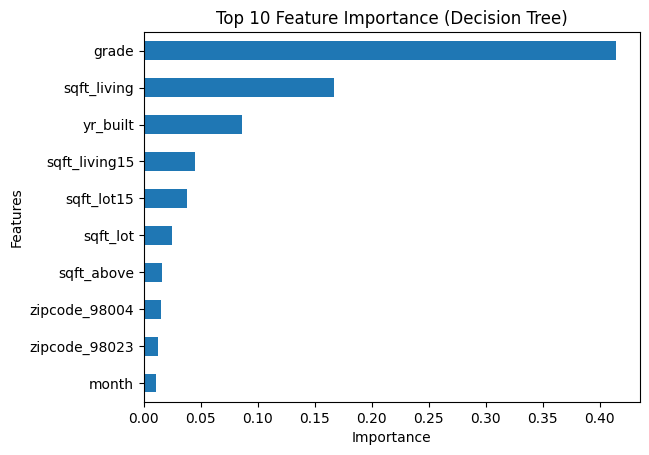

In [41]:
# Convert the NumPy array to a pandas Series for plotting
importances_rf = pd.Series(best_rf.feature_importances_, index=X_train.columns)

# Select the top 10 features by importance
top_10_importances_rf = importances_rf.sort_values(ascending=False).head(10)

top_10_importances_rf.sort_values().plot(kind='barh')
plt.title("Top 10 Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

## **Gradient Boosting**

In [42]:
#Gradient Boosting

from sklearn.ensemble import GradientBoostingRegressor


model_gb = GradientBoostingRegressor()
model_gb.fit(X_train, y_train)

#Calculate loss
y_train_pred_gb = model_gb.predict(X_train)
y_test_pred_gb = model_gb.predict(X_test)
gb_train_loss_ms = mean_squared_error(y_train, y_train_pred_gb)
gb_test_loss_ms = mean_squared_error(y_test, y_test_pred_gb)


#Calculate Cross-Validation Scores

gb_scores_mse = cross_val_score(model_gb, X, y, cv=5, scoring='neg_mean_squared_error')

print(f'Gradient Boosting R2: {model_gb.score(X_test, y_test)}')
print(f'Gradient Boosting train MSE: {gb_train_loss_ms}')
print(f'Gradient Boosting test MSE: {gb_test_loss_ms}')
print(f'Gradient Boosting neg_mean_squared_error: {gb_scores_mse.mean()} +/- {gb_scores_mse.std()}')

Gradient Boosting R2: 0.8015023619858412
Gradient Boosting train MSE: 0.05320786963656888
Gradient Boosting test MSE: 0.05486010575275941
Gradient Boosting neg_mean_squared_error: -0.055868219591748536 +/- 0.0019424532883737858


## **XGBoost**

In [43]:
from xgboost import XGBRegressor

#Define model
xgb = XGBRegressor(
    objective='reg:squarederror',  # for regression
    random_state=42,
    n_jobs=-1
)

#Define parameter grid
param_grid = {
    'n_estimators':[100, 200, 300],
    'max_depth':[3,4,5],
    'learning_rate':[0.01, 0.1, 0.2],
    'subsample':[0.7, 0.8, 0.9],
    'colsample_bytree':[0.6, 0.7, 0.8]
}

#Set up GridSearch
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    n_jobs=-1
)


grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_

print("Best parameters:", grid_search.best_params_)
print("Best cross-validated MSE:", -grid_search.best_score_)

y_pred_train_xgb = best_xgb.predict(X_train)
train_mse_xgb = mean_squared_error(y_train, y_pred_train_xgb)
y_pred_test_xgb = best_xgb.predict(X_test)
test_mse_xgb = mean_squared_error(y_test, y_pred_test_xgb)
xgb_r2_score = r2_score(y_test, y_pred_test_xgb)
test_mae_xgb = mean_absolute_error(y_test, y_pred_test_xgb)

print("R2 Score:", xgb_r2_score)
print("Train MSE:", train_mse_xgb)
print("Test MSE:", test_mse_xgb)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.8}
Best cross-validated MSE: 0.03353304001800242
R2 Score: 0.8805204578049508
Train MSE: 0.0222993616953267
Test MSE: 0.033021351718271516


## **Feature Importances(XGBoost)**


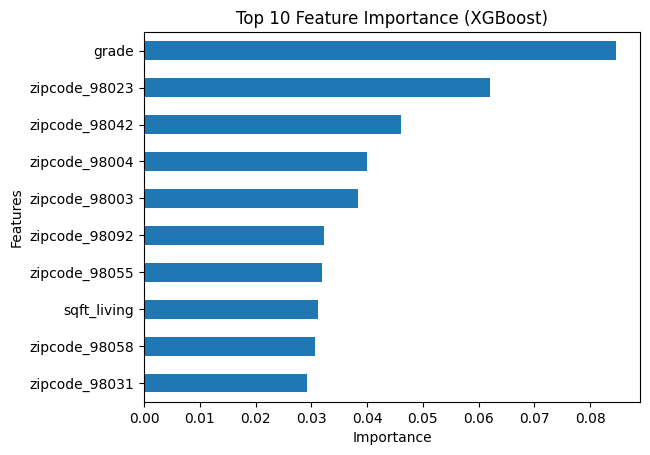

In [44]:
from xgboost import plot_importance
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the trained XGBoost model
importances_xgb = best_xgb.feature_importances_

# Convert the NumPy array to a pandas Series for plotting
importances_xgb = pd.Series(importances_xgb, index=X_train.columns)

# Select the top 10 features by importance
top_10_importances_xgb = importances_xgb.sort_values(ascending=False).head(10)

# Plot the top 10 feature importances
top_10_importances_xgb.sort_values().plot(kind='barh')
plt.title('Top 10 Feature Importance (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [46]:
metrics = {
    'Linear Regression': {'MSE': lr_test_loss_ms, 'RMSE': lr_test_loss_ms**0.5 , 'MAE': lr_test_loss_mae, 'R2': lr_scores_r2},
    'Decision Tree': {'MSE': test_mse_df, 'RMSE': test_mse_df**0.5, 'MAE': test_mae_df, 'R2': dt_r2_score},
    'Random Forest': {'MSE': test_mse_rf, 'RMSE': test_mse_rf**0.5, 'MAE': test_mae_rf, 'R2': rf_r2_score},
    'XGBoost': {'MSE': test_mse_xgb, 'RMSE': test_mse_xgb**0.5, 'MAE': test_mae_xgb, 'R2': xgb_r2_score}
}

df_metrics = pd.DataFrame(metrics)
df_metrics

,Linear Regression,Decision Tree,Random Forest,XGBoost
MSE,0.044959,0.074399,0.046776,0.033021
RMSE,0.212035,0.272761,0.216278,0.181718
MAE,0.161330,0.195275,0.155828,0.131553
R2,0.813407,0.730807,0.830752,0.880520


## **Conclusion**

Four models were used to predict housing prices in King County, WA. A linear regression model was developed with its assumptions checked to ensure validity. Tree-based models (Decision Tree, Random Forest, and XGBoost) were optimized using GridSearchCV to prevent overfitting. Among them, the XGBoost model achieved the best performance, with an MSE of 0.033, representing the lowest prediction error. In addition to MSE, both the RMSE and MAE also showed the lowest errors. The R² score was 0.88, indicating that 88% of the variation in house prices could be explained by independent variables such as location, grade, and size. Furthermore, the evaluation metrics from both the training and test sets indicated that the model was neither overfitted nor underfitted. As a result, XGBoost was identified as the best model for predicting house prices.